**Principal Component Analysis**

You will implement dimensionality reduction with PCA.  

1). Read iris_dataset.csv (4 features, hence 4 PCs) and remove the first class

2). Find the principal components

3). Recontruct the dataset (X_hat)

4). Determine the accuracy of X_hat for 1-4 PCs using a LBF SVM classifier (provided)


In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.svm import SVC # This package will help you run the SVM model directly
from sklearn.metrics import accuracy_score # Use accruacy_score to find out accuracy of your model
from sklearn.model_selection import train_test_split

# from google.colab import drive

# drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/HW7/iris_dataset.csv'

# Load data - 150 observations, 4 features, 3 classes
df = pd.read_csv(file_path, header=None)
data = df.values

# Remove the first class and change the class index
X_raw = data[50:,0:4]               # From 150 to 100 samples
y = np.subtract(data[50:,4],2)  # From class 2/3 to class 0/1

SVM classifier (with 20% of the data as the test sets)

In [ ]:
def svm_accuracy(X_hat, y, num_pc):
    X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2)

    clf = SVC(kernel='linear') # Use the linear function of the SVM algorithm
    clf.fit(X_train,y_train) # Train the model using the x_train and y_train
    y_pred = clf.predict(X_test) # Run prediction after training on the testing dataset
    print(num_pc, accuracy_score(y_test,y_pred)) # Print your final accuracy
    return accuracy_score(y_test,y_pred)

PCA (Your code goes here)

In [ ]:
def PCA(X, Num_PC):

  cov = X.T @ X

  eigen_values, eigen_vectors = LA.eig(cov)

  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]

  sorted_eigenvectors = eigen_vectors[sorted_index]

  print (sorted_eigenvectors[0])


  eigenvector_subset = sorted_eigenvectors[:,0:Num_PC]

  X_reduced = np.dot(X, eigenvector_subset)

  return X_reduced

[0.55651978 0.3387169  0.75862976 0.00612235]


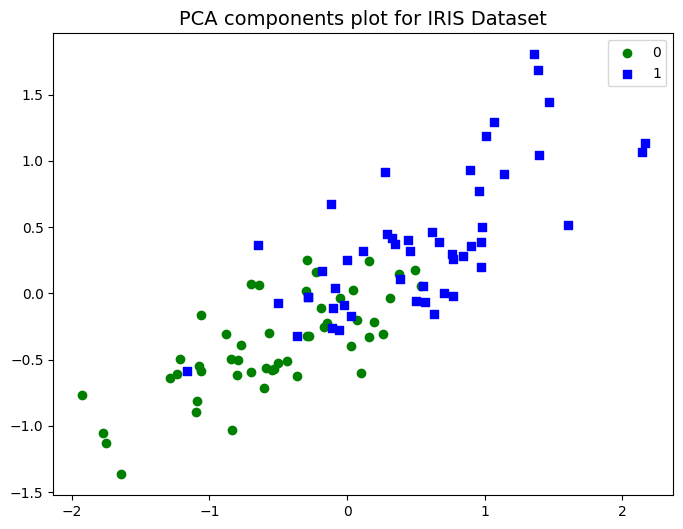

[0.55651978 0.3387169  0.75862976 0.00612235]
1 0.85
1 0.75
1 0.7
1 0.85
1 0.75
1 0.5
1 0.7
1 0.7
1 0.65
1 0.8
Average accuracy 0.7250000000000001
[0.55651978 0.3387169  0.75862976 0.00612235]
2 0.8
2 0.8
2 0.65
2 0.75
2 0.95
2 0.65
2 0.85
2 0.7
2 0.95
2 0.85
Average accuracy 0.795
[0.55651978 0.3387169  0.75862976 0.00612235]
3 0.9
3 0.95
3 0.8
3 0.85
3 0.95
3 0.95
3 0.8
3 1.0
3 0.85
3 0.85
Average accuracy 0.89
[0.55651978 0.3387169  0.75862976 0.00612235]
4 1.0
4 0.95
4 1.0
4 0.95
4 1.0
4 0.95
4 0.85
4 0.95
4 0.95
4 0.95
Average accuracy 0.9549999999999998


In [ ]:
u = [np.mean(X_raw[:,0]), np.mean(X_raw[:,1]), np.mean(X_raw[:,2]), np.mean(X_raw[:,3])]
XM = np.subtract(X_raw,u)  # Subtracting the mean from each feature


X_pca = PCA(XM,2)

plt.figure(figsize=(8,6))

# Scatter plot for class 0
plt.scatter(X_pca[0:50,0], X_pca[0:50,1], color='green', marker='o', label='0')

# Scatter plot for class 1
plt.scatter(X_pca[50:100,0], X_pca[50:100,1], color='blue', marker='s', label='1')

plt.title("PCA components plot for IRIS Dataset", fontsize=14)
plt.legend()
plt.show()

avg_accuracy_list = []

for i in range(4):
  num_pc = i+1
  X_hat = PCA(XM,num_pc)
  avg_accuracy = 0
  for r in range(10):
    avg_accuracy += svm_accuracy(X_hat, y, num_pc)
  avg_accuracy_list.append(avg_accuracy/10)
  print("Average accuracy", avg_accuracy/10)

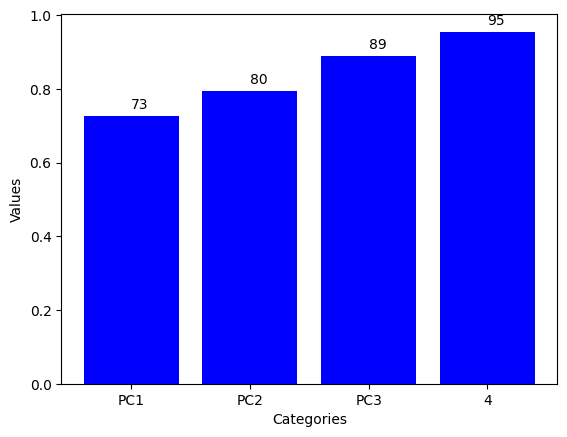

In [ ]:
import matplotlib.pyplot as plt

categories = ['PC1', 'PC2', 'PC3', '4']

plt.bar(categories, avg_accuracy_list, color='blue')
plt.xlabel('Categories')
plt.ylabel('Values')

for i, value in enumerate(avg_accuracy_list):
    plt.text(i, value + 0.02 , str(round(value*100)))

plt.show()